In [4]:
%pip install -q ollama

Note: you may need to restart the kernel to use updated packages.


In [2]:
import ollama

In [8]:
# Read the string from a file
with open('input.txt', 'r') as file:
    data = file.read()

# Split the string by spaces
split_data = data.split()

print(split_data)

['The', '1921', 'Centre', 'vs.', 'Harvard', 'football', 'game', 'was', 'a', 'regular-season', 'collegiate', 'American', 'football', 'game', 'played', 'on', 'October', '29,', '1921,', 'at', 'Harvard', 'Stadium', 'in', 'Boston,', 'Massachusetts.', 'The', 'contest', 'featured', 'the', 'undefeated', 'Centre', 'Praying', 'Colonels,', 'representing', 'Centre', 'College,', 'and', 'the', 'undefeated', 'Harvard', 'Crimson,', 'representing', 'Harvard', 'University.', 'Centre', 'won', 'the', 'game', '6–0,', 'despite', 'entering', 'as', 'heavy', 'underdogs,', 'leading', 'to', 'the', 'game', 'being', 'widely', 'viewed', 'as', 'one', 'of', 'the', 'largest', 'upsets', 'in', 'college', 'football', 'history.', 'The', 'game', 'is', 'often', 'referred', 'to', 'by', 'the', 'shorthand', 'C6H0;', 'this', 'originated', 'shortly', 'after', 'the', 'game', 'when', 'a', 'Centre', 'professor', 'remarked', 'that', 'Harvard', 'had', 'been', 'poisoned', 'by', 'this', '"impossible"', 'chemical', 'formula.', 'The', 't

In [28]:
%%time

# Generate an embedding for the given prompt using the 'nomic-embed-text' model
embedding = ollama.embeddings(model='nomic-embed-text', prompt='The sky is blue because of rayleigh scattering')

# Print the generated embedding
print(embedding)

{'embedding': [0.5889396667480469, 0.4007473886013031, -3.303079605102539, -0.5259866118431091, 0.7489979267120361, 1.5185692310333252, -0.12516480684280396, 0.3959057927131653, 0.06783682852983475, -1.108922004699707, 0.6926950216293335, 1.2775626182556152, 1.1459660530090332, 1.0890027284622192, 0.2503696084022522, 0.29292216897010803, 0.15192046761512756, -0.6344472169876099, -0.21012043952941895, -0.19580215215682983, -1.7958945035934448, -0.6292113065719604, 0.038881901651620865, -0.6687125563621521, 1.2612438201904297, 1.2771329879760742, -0.15992321074008942, -0.0025259405374526978, -0.2972709834575653, -0.4807690382003784, 1.205121636390686, -0.638407826423645, -0.5400077104568481, -1.035507082939148, 0.6315202116966248, -1.2089321613311768, 0.6833165884017944, -0.05853591114282608, -0.1972302496433258, 0.12766246497631073, -0.014373771846294403, -0.5544900894165039, 0.3517289161682129, 0.044941507279872894, 0.5974558591842651, -0.9552335143089294, 0.5079662799835205, 1.5737223

In [22]:
window_size = 10
sliding_windows = [split_data[i:i + window_size] for i in range(len(split_data) - window_size + 1)]

print(sliding_windows)

embeddings_list = []

for window in sliding_windows:
    content = " ".join(window)
    embedding = ollama.embeddings(model='nomic-embed-text', prompt=content)
    embeddings_list.append(embedding)

[['The', '1921', 'Centre', 'vs.', 'Harvard', 'football', 'game', 'was', 'a', 'regular-season'], ['1921', 'Centre', 'vs.', 'Harvard', 'football', 'game', 'was', 'a', 'regular-season', 'collegiate'], ['Centre', 'vs.', 'Harvard', 'football', 'game', 'was', 'a', 'regular-season', 'collegiate', 'American'], ['vs.', 'Harvard', 'football', 'game', 'was', 'a', 'regular-season', 'collegiate', 'American', 'football'], ['Harvard', 'football', 'game', 'was', 'a', 'regular-season', 'collegiate', 'American', 'football', 'game'], ['football', 'game', 'was', 'a', 'regular-season', 'collegiate', 'American', 'football', 'game', 'played'], ['game', 'was', 'a', 'regular-season', 'collegiate', 'American', 'football', 'game', 'played', 'on'], ['was', 'a', 'regular-season', 'collegiate', 'American', 'football', 'game', 'played', 'on', 'October'], ['a', 'regular-season', 'collegiate', 'American', 'football', 'game', 'played', 'on', 'October', '29,'], ['regular-season', 'collegiate', 'American', 'football', 'g

In [15]:
%pip install -q numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to calculate cosine similarity between two embeddings
def calculate_cosine_similarity(embedding1, embedding2):
    return cosine_similarity([embedding1], [embedding2])[0][0]

# Calculate cosine similarity for consecutive embeddings
cosine_similarities = []

for i in range(len(embeddings_list) - 1):
    embedding1 = embeddings_list[i]['embedding']
    embedding2 = embeddings_list[i + 1]['embedding']
    similarity = calculate_cosine_similarity(embedding1, embedding2)
    cosine_similarities.append(similarity)

print(cosine_similarities)

[np.float64(0.9612735034150333), np.float64(0.8444521760912299), np.float64(0.8968694349912683), np.float64(0.9734320734737087), np.float64(0.909238670451576), np.float64(0.9771947190448834), np.float64(0.9210767736534233), np.float64(0.9519372200988384), np.float64(0.8750827708225715), np.float64(0.9590802846409856), np.float64(0.9051175565295593), np.float64(0.9800583419503982), np.float64(0.9708615187646398), np.float64(0.963148246479616), np.float64(0.9402423059898348), np.float64(0.9900476683453534), np.float64(0.8960137110798412), np.float64(0.9647577738223281), np.float64(0.9134822443365017), np.float64(0.8988279034299553), np.float64(0.8715391280629121), np.float64(0.9001313472520749), np.float64(0.9045049241352845), np.float64(0.9596460462287154), np.float64(0.9099527598844124), np.float64(0.9636153544231532), np.float64(0.9482708068977403), np.float64(0.9669136716845467), np.float64(0.9774429051390022), np.float64(0.9374669370658267), np.float64(0.9693126917794427), np.float6

In [27]:
%pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.


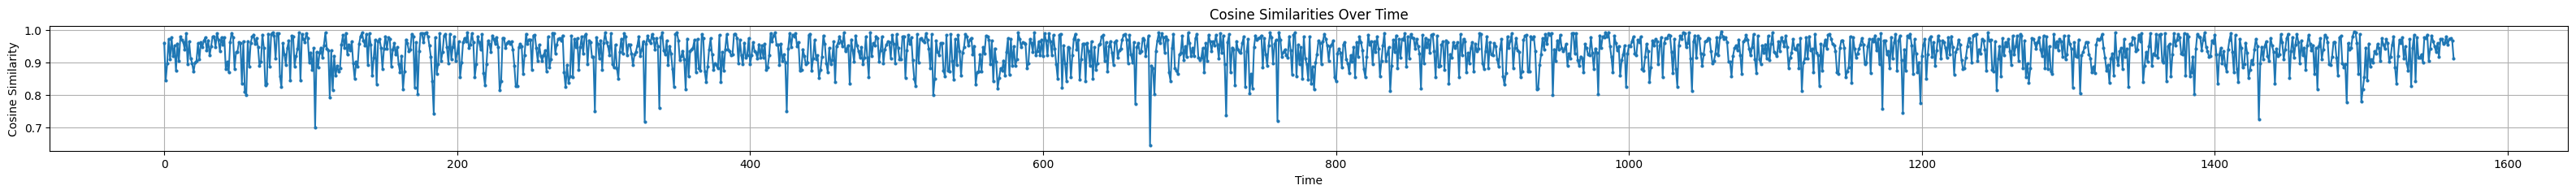

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 2))
plt.plot(range(len(cosine_similarities)), cosine_similarities, marker='o', linestyle='-', markersize=2)
plt.title('Cosine Similarities Over Time')
plt.xlabel('Time')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.show()